Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.3336 - accuracy: 0.9075 - val_loss: 0.1844 - val_accuracy: 0.9491
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1511 - accuracy: 0.9561 - val_loss: 0.1307 - val_accuracy: 0

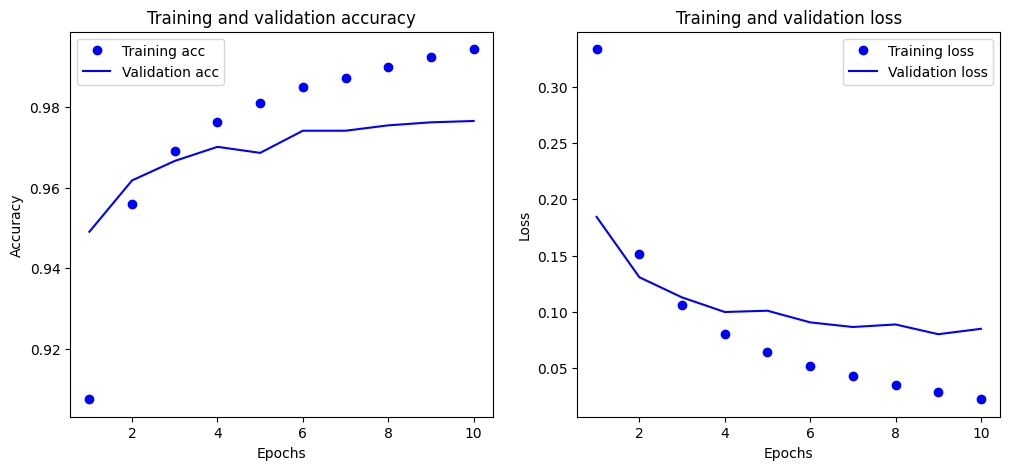

In [2]:
#Завантаження та підготовка даних:

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Завантаження даних MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Нормалізація зображень та розділення на тренувальні та тестувальні набори
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Преобразування міток в категоріальний формат
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
#Створення нейронної мережі:

model = models.Sequential()

# Додавання згладжуючого шару та повнозв'язного шару
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Виведення структури мережі
model.summary()
#Тренування моделі:

# Вибір функції втрати, оптимізатора та метрики
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Навчання моделі
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)
#Оцінка ефективності моделі та візуалізація результатів:

# Оцінка точності на тестовому наборі даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Візуалізація результатів
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()